#Avec quelques villes françaises

In [ ]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
import pandas as pd
villes = ["Dunkerque","Brest","Paris","Strasbourg","Lyon","Toulouse","Marseille","Nice","Perpignan"]

latlong=[]

for i in villes:
  loc = geolocator.geocode(i+','+ "France")
  latlong.append((loc.latitude,loc.longitude))

latlong

[(51.0347708, 2.3772525),
 (48.3905283, -4.4860088),
 (48.8566969, 2.3514616),
 (48.584614, 7.7507127),
 (45.7578137, 4.8320114),
 (43.6044622, 1.4442469),
 (43.2961743, 5.3699525),
 (43.7009358, 7.2683912),
 (42.6985304, 2.8953121)]

In [ ]:
table_villes=pd.DataFrame(index=villes,columns=['LAT','LONG'],data=latlong)

In [ ]:
table_villes

,LAT,LONG
Dunkerque,51.034771,2.377252
Brest,48.390528,-4.486009
Paris,48.856697,2.351462
Strasbourg,48.584614,7.750713
Lyon,45.757814,4.832011
Toulouse,43.604462,1.444247
Marseille,43.296174,5.369953
Nice,43.700936,7.268391
Perpignan,42.698530,2.895312


In [ ]:
distances = pd.DataFrame(columns=villes,index=villes)

In [ ]:
from geopy.distance import geodesic 
for nr,row in enumerate(villes):
  for nc,col in enumerate(villes):
    distances.loc[row,col] = geodesic(latlong[nr], latlong[nc]).km

In [ ]:
distances

,Dunkerque,Brest,Paris,Strasbourg,Lyon,Toulouse,Marseille,Nice,Perpignan
Dunkerque,0,575.429,242.27,472.945,614.205,829.066,889.549,894.654,927.559
Brest,575.429,0,506.553,903.822,765.2,702.446,951.019,1046.88,855.073
Paris,242.27,506.553,0,398.343,392.224,587.983,660.562,686.726,685.762
Strasbourg,472.945,903.822,398.343,0,384.286,737.229,616.037,544.115,755.452
Lyon,614.205,765.2,392.224,384.286,0,359.665,276.864,299.128,373.468
Toulouse,829.066,702.446,587.983,737.229,359.665,0,319.568,469.874,155.11
Marseille,889.549,951.019,660.562,616.037,276.864,319.568,0,159.989,212.425
Nice,894.654,1046.88,686.726,544.115,299.128,469.874,159.989,0,372.412
Perpignan,927.559,855.073,685.762,755.452,373.468,155.11,212.425,372.412,0


In [ ]:
#librairie pour MDS
from sklearn import manifold
#MDS
mds = manifold.MDS(n_components=2,random_state=1,dissimilarity="precomputed")
#apprentissage
mds.fit(distances)

D=distances.copy()
#coordonnées des points dans le plan puisque (n_components = 2)
points = mds.embedding_
print(points)


[[-110.88663319  523.3914175 ]
 [ 458.20490975  443.74081187]
 [ -26.44545645  296.50904142]
 [-394.04056101  143.83695594]
 [ -89.47453798  -90.54649527]
 [ 243.85427241 -225.72889094]
 [ -44.54739743 -363.6828248 ]
 [-204.60788901 -366.47426306]
 [ 167.94329291 -361.04575265]]


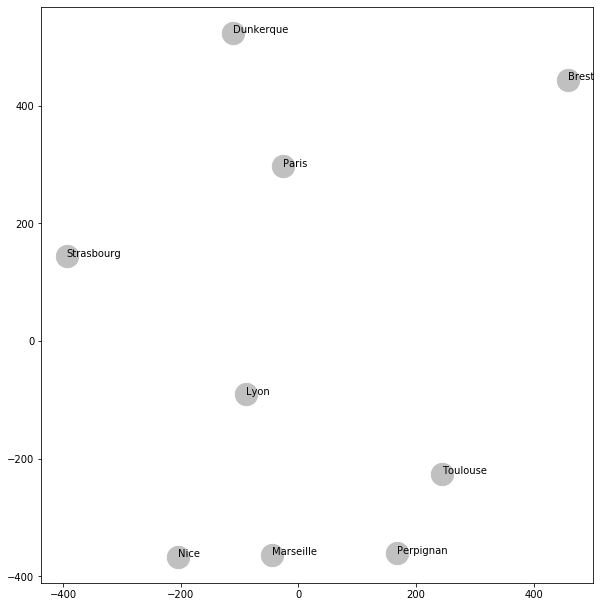

In [ ]:
#librairie graphique
import matplotlib.pyplot as plt
#définir la taille du graphique
ax = plt.axes([0,0,2,2])
#ajuster le ratio abscisse - ordonnée
ax.set_aspect(aspect='equal')
#placer les points dans le plan (abscisse, ordonnée)
plt.scatter(points[:,0],points[:,1],color='silver',s=500)
#ajouter les étiquettes dans le graphique
for i in range(D.shape[0]):
 ax.annotate(D.index[i],(points[i,0],points[i,1]),color='black')
#afficher le graphique
plt.show()


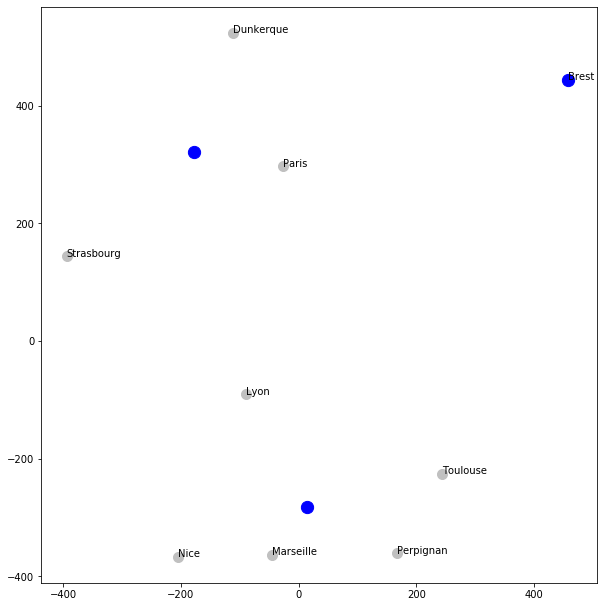

In [ ]:
#En bonus un k-means par ville
#K-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=1)
#modélisation
km.fit(points)

#graphique avec les barycentres
ax = plt.axes([0,0,2,2])
ax.set_aspect(aspect='equal')
plt.scatter(points[:,0],points[:,1],color='silver',s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',s=150)
#ajouter les étiquettes dans le graphique
for i in range(D.shape[0]):
 ax.annotate(D.index[i],(points[i,0],points[i,1]),color='black')
plt.show()

[0.44204651 0.41231509 0.31749699 0.31542969 0.30807999 0.21125285
 0.08717381]


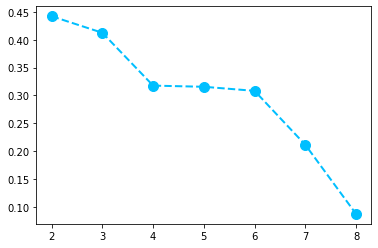

In [ ]:
#outil pour le calcul du coefficient silhouette
import numpy as np
from sklearn.metrics import silhouette_score
#balayage des différentes valeurs de K
nb=7
sil = np.zeros(nb)
for K in range(2,nb+2):
 kms = KMeans(n_clusters=K,random_state=1).fit(points)
 sil[K-2] = silhouette_score(points,kms.labels_,metric='euclidean')
#valeurs des silhouettes
print(sil)
plt.plot(range(2,nb+2),sil,'--o',color='deepskyblue',linewidth=2,markersize=10)
plt.show()

In [ ]:
df.head()

,iata,airport,city,state,country,lat,long,cnt,text
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129,"Chicago O'Hare InternationalChicago, ILArrival..."
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925,"William B Hartsfield-Atlanta IntlAtlanta, GAAr..."
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662,Dallas-Fort Worth InternationalDallas-Fort Wor...
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290,"Phoenix Sky Harbor InternationalPhoenix, AZArr..."
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781,"Denver IntlDenver, COArrivals: 13781"


In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(
        lon = table_villes['LONG'],
        lat = table_villes['LAT'],
        text = table_villes.index,
        mode = 'markers',
        marker_color = table_villes['LAT'],
        ))

fig.update_layout(
        title = 'Villes françaises<br>(Pour faire un essai)',
        geo_scope='europe',
    )
fig.show()